# Métodos de validación para reconocimiento de dígitos

Veamos como interactuar con las clases implementadas en el módulo de C++ haciendo una experimentación muy simplificada.
Utilizaremos el método de validación K-fold cross-validation y luego el método de validación porcentual.

## Compilando el módulo desde C++

Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/ariana/Dropbox/Métodos numéricos/mn_tp2/tp2/venv-tp2/bin/python (found version "3.8.10") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/ariana/Dropbox/Métodos numéricos

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum
import kfold
import split
import numpy as np
import matplotlib.pyplot as plt

/home/ariana/Dropbox/Métodos numéricos/mn_tp2/tp2/notebooks
Python 3.8.10


# Experimentacion con distinta cantidad de imágenes

## Utilizando validación porcentual

In [5]:
line_styles = ['b.-', 'r.-', 'g.-', 'k.-', 'y.-', 'm.-', 'c.-']
k = 3
size_list = [x for x in range(10000,42000,10000)]
knn_accuracities_K = []
knn_Times_K = []
knn_Precision_K = []
knn_Recall_K = []
knn_F_Score_K = []
knn_Matrix_K = np.zeros((10,10))

for size in size_list:
    res =  split.tests_split(k, True, 32, "../data/train.csv", size)  
    knn_accuracities_K.append(res[0])    
    knn_Times_K.append(res[1])
    knn_Precision_K.append(res[2])
    knn_Recall_K.append(res[3])
    knn_F_Score_K.append(res[4])
    knn_Matrix_K=knn_Matrix_K+res[5]
    
knn_accuracities_K = np.asarray(knn_accuracities_K)
knn_Times_K = np.asarray(knn_Times_K)
knn_Precision_K = np.asarray(knn_Precision_K)
knn_Recall_K = np.asarray(knn_Recall_K)
knn_F_Score_K = np.asarray(knn_F_Score_K)

data = [knn_accuracities_K, knn_Times_K, knn_Precision_K, knn_Recall_K, knn_F_Score_K]

### Accuracy

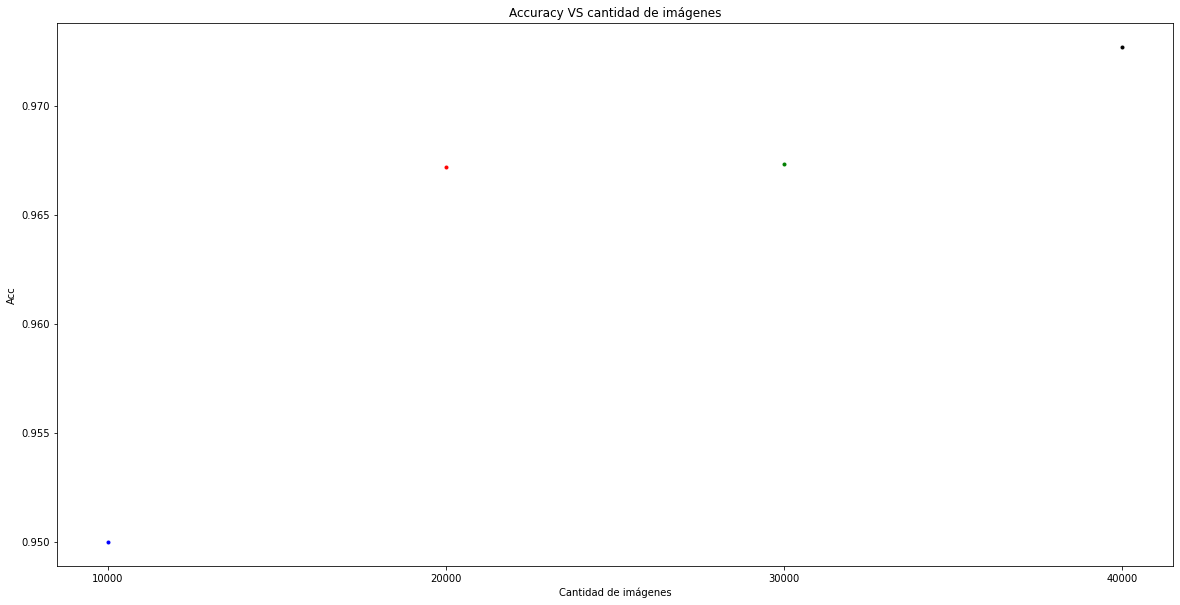

In [6]:
size_list = [x for x in range(10000,42000,10000)]
knn_accuracities_K = data[0]
Y_list = np.arange(0.85, 0.96, 0.02)
plt.figure(figsize=(20,10))    
plt.title("Accuracy VS cantidad de imágenes")
for s in range(len(size_list)):    
    plt.plot(size_list[s],knn_accuracities_K[s], line_styles[s])
    plt.ylabel("Acc")
    plt.xlabel("Cantidad de imágenes")
    plt.xticks(size_list)
    #plt.yticks(Y_list)
    plt.savefig("Cantidad de imágenes VS K-value/accPorc")
  

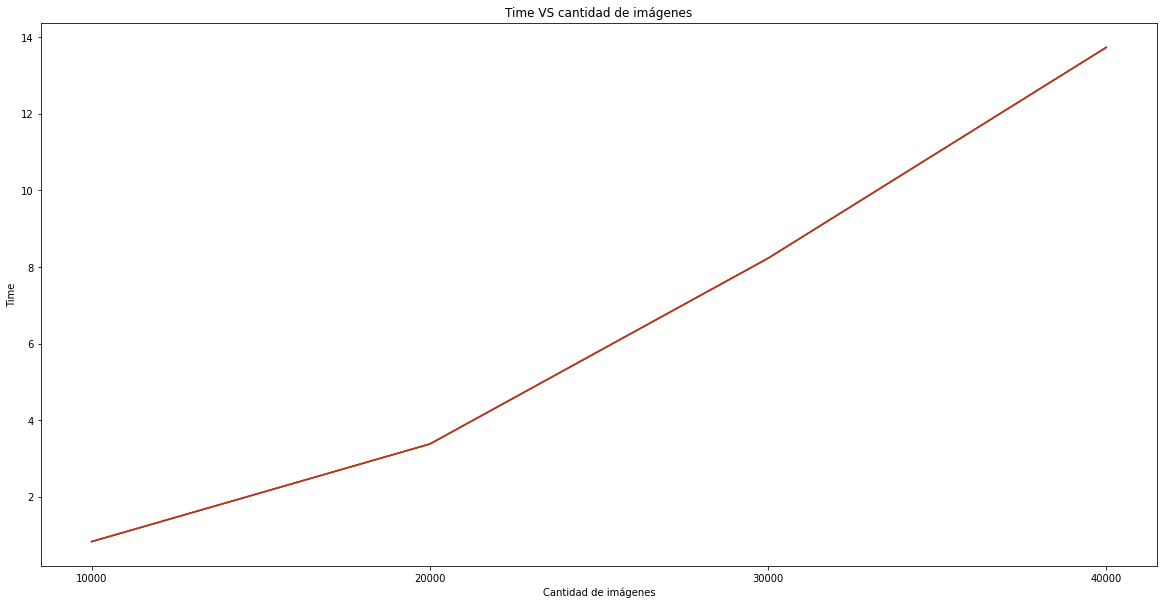

In [7]:
knn_times_K = data[1]
Y_list = np.arange(0, 21, 2.5)
plt.figure(figsize=(20,10))    
plt.title("Time VS cantidad de imágenes")
for s in range(len(size_list)):    
    plt.plot(size_list,knn_times_K)
    plt.ylabel("Time")
    plt.xlabel("Cantidad de imágenes")
    plt.xticks(size_list)
    #plt.yticks(Y_list)
    plt.savefig("Cantidad de imágenes VS K-value/timeMean2.png")

In [4]:
line_styles = ['b.-', 'r.-', 'g.-', 'k.-', 'y.-', 'm.-', 'c.-']
k = 3
size_list = [x for x in range(200,900,100)]
knn_accuracities_K = []
knn_Times_K = []
knn_Precision_K = []
knn_Recall_K = []
knn_F_Score_K = []

knn_Matrix_K = np.zeros((10,10))
for size in size_list:
    res =  split.tests_split(k, True, 32, "../data/train.csv", size)  
    knn_accuracities_K.append(res[0])    
    knn_Times_K.append(res[1])
    knn_Precision_K.append(res[2])
    knn_Recall_K.append(res[3])
    knn_F_Score_K.append(res[4])
    knn_Matrix_K=knn_Matrix_K+res[5]
    
knn_accuracities_K = np.asarray(knn_accuracities_K)
knn_Times_K = np.asarray(knn_Times_K)
knn_Precision_K = np.asarray(knn_Precision_K)
knn_Recall_K = np.asarray(knn_Recall_K)
knn_F_Score_K = np.asarray(knn_F_Score_K)


data = [knn_accuracities_K, knn_Times_K, knn_Precision_K, knn_Recall_K, knn_F_Score_K]

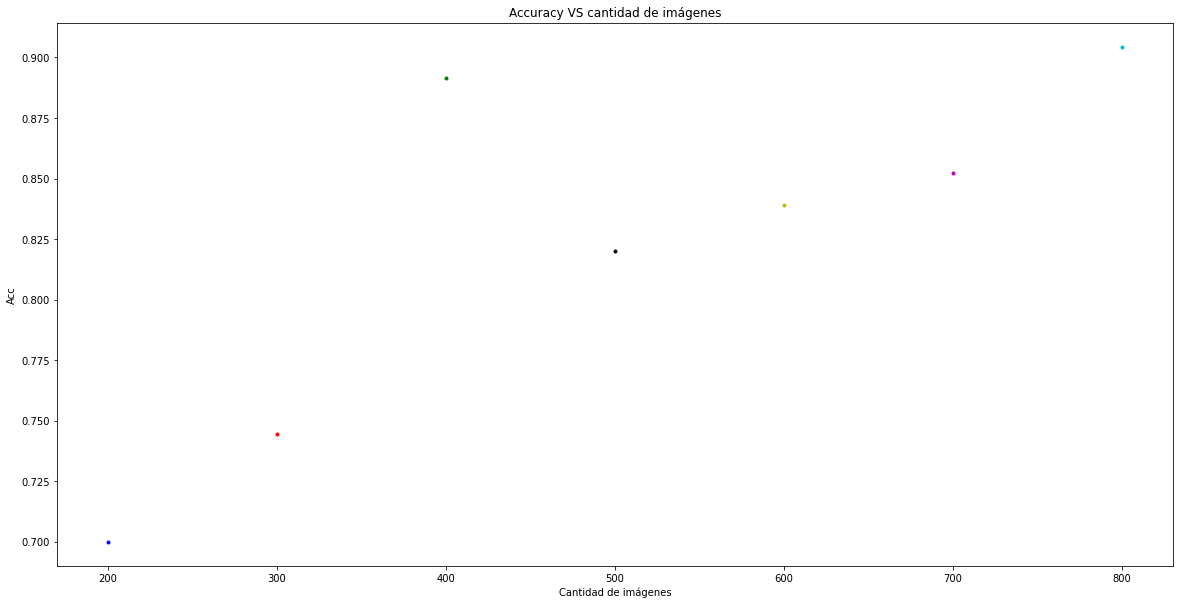

In [6]:
knn_accuracities_K = data[0]
Y_list = np.arange(0.5, 0.90, 0.05)
plt.figure(figsize=(20,10))    
plt.title("Accuracy VS cantidad de imágenes")
for s in range(len(size_list)):    
    plt.plot(size_list[s],knn_accuracities_K[s], line_styles[s])
    plt.ylabel("Acc")
    plt.xlabel("Cantidad de imágenes")
    plt.xticks(size_list)
    #plt.yticks(Y_list)
    plt.savefig("Cantidad de imágenes VS K-value/accPorc22")
  

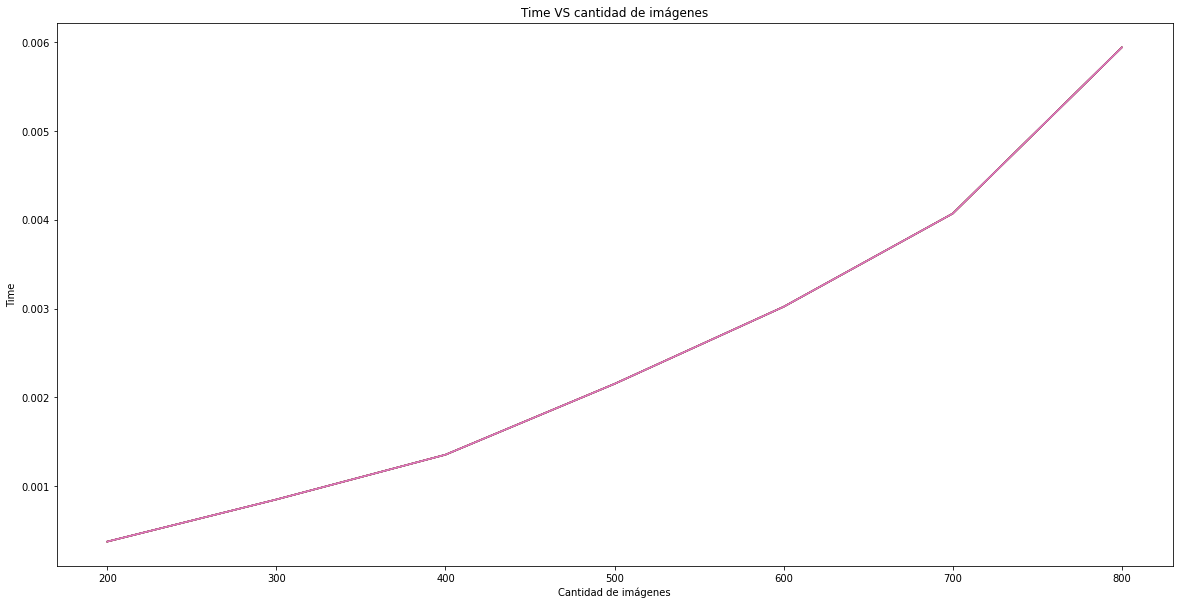

In [10]:
knn_times_K = data[1]
Y_list = np.arange(0, 21, 2.5)
plt.figure(figsize=(20,10))    
plt.title("Time VS cantidad de imágenes")
for s in range(len(size_list)):    
    plt.plot(size_list,knn_times_K)
    plt.ylabel("Time")
    plt.xlabel("Cantidad de imágenes")
    plt.xticks(size_list)
    #plt.yticks(Y_list)
    plt.savefig("Cantidad de imágenes VS K-value/timeMean2.png")

## Utilizando K-fold cross validation

In [24]:
line_styles = ['b.-', 'r.-', 'g.-', 'k.-', 'y.-', 'm.-', 'c.-']
k = 3
K_list = [x for x in range(2, 25)]
size_list = [x for x in range(10000,42000,10000)]
knn_accuracities_K = []
knn_Times_K = []
knn_Times_sum_K = []
knn_Precision_K = []
knn_Recall_K = []
knn_F_Score_K = []

knn_Matrix_K = np.zeros((10,10))
for size in size_list:
    for K in K_list:
        res =  kfold.tests_KFolds(k, K, True, 32, "../data/train.csv", size)  
        knn_accuracities_K.append(res[0])    
        knn_Times_K.append(res[1])
        knn_Precision_K.append(res[2])
        knn_Recall_K.append(res[3])
        knn_F_Score_K.append(res[4])
        knn_Matrix_K=knn_Matrix_K+res[5]
        knn_Times_sum_K.append(res[1]*K)
knn_accuracities_K = np.asarray(knn_accuracities_K)
knn_Times_K = np.asarray(knn_Times_K)
knn_Precision_K = np.asarray(knn_Precision_K)
knn_Recall_K = np.asarray(knn_Recall_K)
knn_F_Score_K = np.asarray(knn_F_Score_K)
knn_Times_sum_K = np.asarray(knn_Times_sum_K)

data = [knn_accuracities_K, knn_Times_K, knn_Times_sum_K, knn_Precision_K, knn_Recall_K, knn_F_Score_K]

2


KeyboardInterrupt: 

### Accuracy

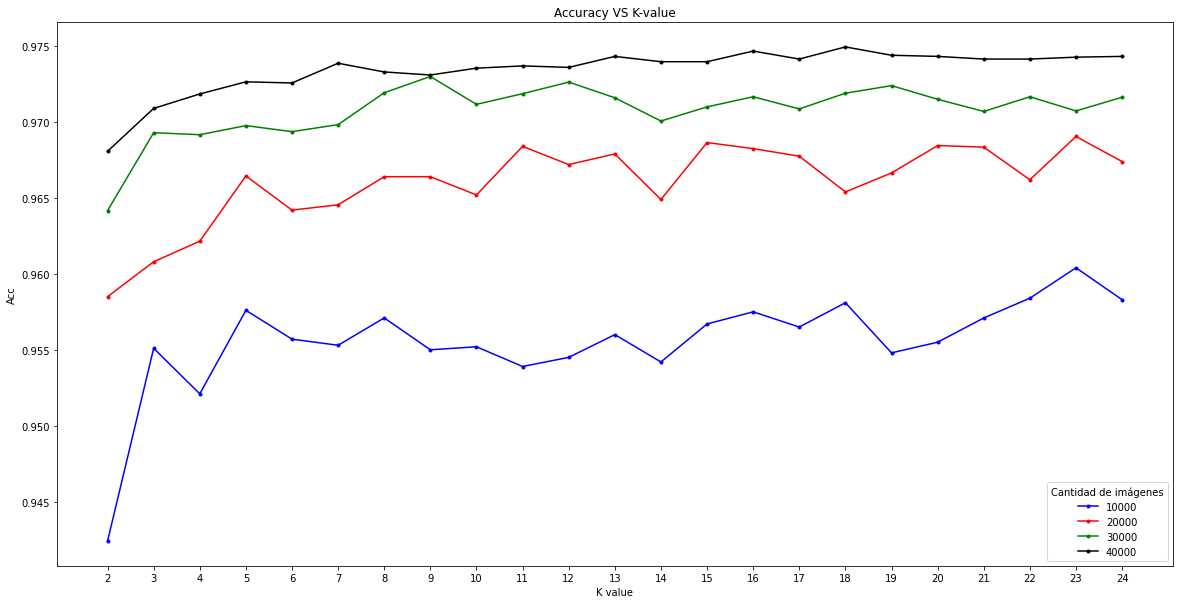

In [73]:
knn_accuracities_K = data[0]
Y_list = np.arange(0.85, 0.96, 0.02)
plt.figure(figsize=(20,10))    
plt.title("Accuracy VS K-value")
for s in range(len(size_list)):    
    plt.plot(K_list,knn_accuracities_K[:23], line_styles[s])
    plt.ylabel("Acc")
    plt.xlabel("K value")
    plt.xticks(K_list)
    #plt.yticks(Y_list)
    plt.gca().legend(size_list, title = "Cantidad de imágenes")
    plt.savefig("Cantidad de imágenes VS K-value/acc")
    knn_accuracities_K = knn_accuracities_K[23:]

### Diferencia entre accuracies

[0.010513317612256934, 0.004727479902502996, 0.002648539911931924]


(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

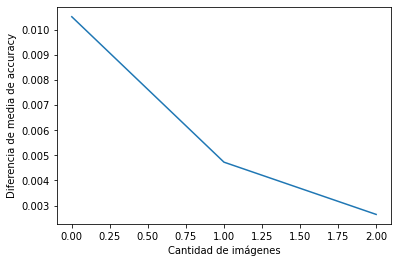

In [74]:
# Calculamos las diferencias de las medias.
knn_accuracities_K = data[0]
knn_accuracities_K_10000 = knn_accuracities_K[:23]
knn_accuracities_K = knn_accuracities_K[23:]
knn_accuracities_K_20000 = knn_accuracities_K[:23]
knn_accuracities_K = knn_accuracities_K[23:]
knn_accuracities_K_30000 = knn_accuracities_K[:23]
knn_accuracities_K = knn_accuracities_K[23:]
knn_accuracities_K_40000 = knn_accuracities_K[:23]

means = [abs(np.mean(knn_accuracities_K_20000)-np.mean(knn_accuracities_K_10000)),
        abs(np.mean(knn_accuracities_K_20000)-np.mean(knn_accuracities_K_30000)),
        abs(np.mean(knn_accuracities_K_30000)-np.mean(knn_accuracities_K_40000))]
#["10000 vs 20000", "20000 vs 30000", "30000 vs 40000"]
print(means)

plt.plot(means)
plt.ylabel("Diferencia de media de accuracy")
plt.xlabel("Cantidad de imágenes")
plt.xticks()
#plt.gca().legend(size_list, title = "Cantidad de imágenes")
#plt.savefig("Cantidad de imágenes VS K-value/acc_a50_k50_1000.png")



### Tiempo

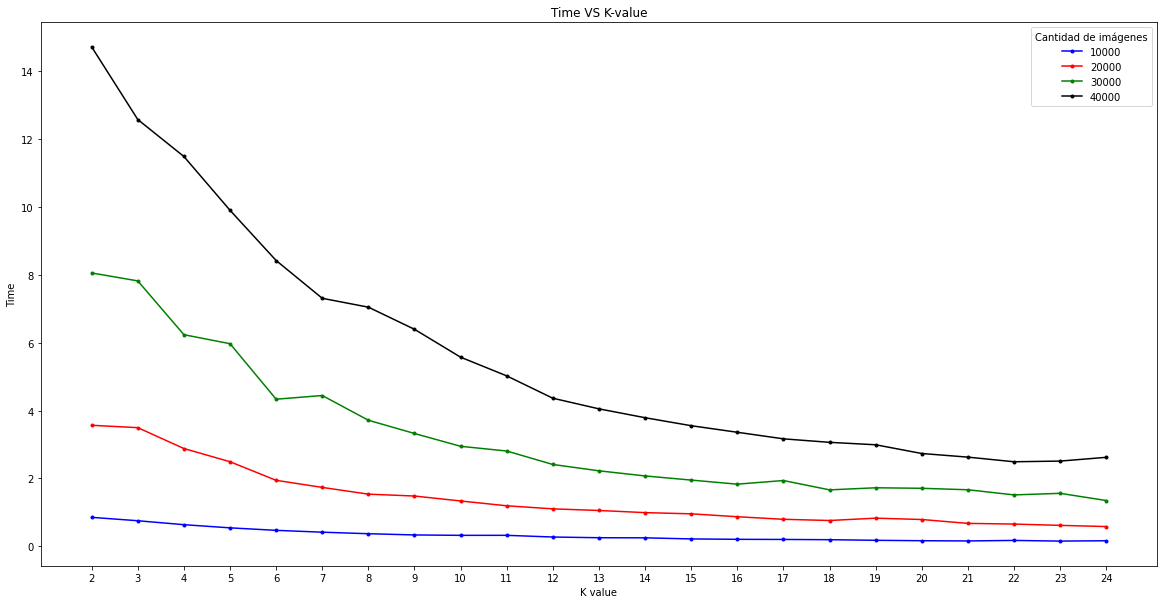

In [75]:
knn_times_K = data[1]
Y_list = np.arange(0, 21, 2.5)
plt.figure(figsize=(20,10))    
plt.title("Time VS K-value")
for s in range(len(size_list)):    
    plt.plot(K_list,knn_times_K[:23], line_styles[s])
    plt.ylabel("Time")
    plt.xlabel("K value")
    plt.xticks(K_list)
    #plt.yticks(Y_list)
    plt.gca().legend(size_list, title = "Cantidad de imágenes")
    plt.savefig("Cantidad de imágenes VS K-value/timeMean.png")
    knn_times_K = knn_times_K[23:]

0.23017689949852094
3.100007578295429
16.98791808202558
45.57104083083213


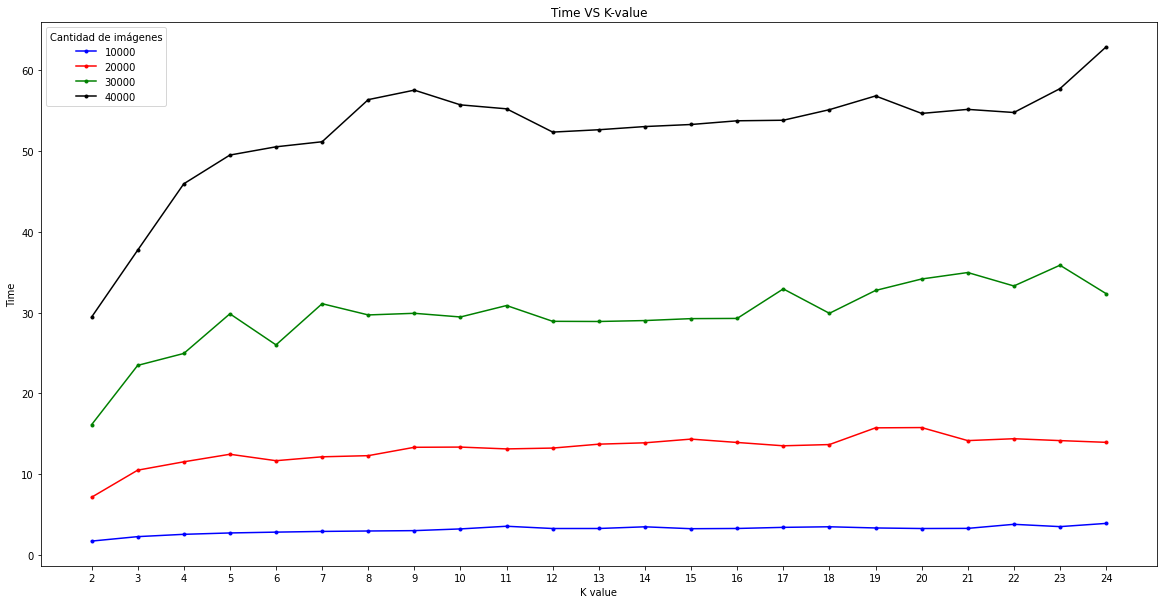

In [82]:
knn_times_K = data[2]
Y_list = np.arange(0, 70, 10)
plt.figure(figsize=(20,10))    
plt.title("Time VS K-value")
for s in range(len(size_list)):    
    plt.plot(K_list,knn_times_K[:23], line_styles[s])
    print(np.var(knn_times_K[:23]))
    plt.ylabel("Time")
    plt.xlabel("K value")
    plt.xticks(K_list)
    #plt.yticks(Y_list)
    plt.gca().legend(size_list, title = "Cantidad de imágenes")
    plt.savefig("Cantidad de imágenes VS K-value/timeSum.png")
    knn_times_K = knn_times_K[23:]

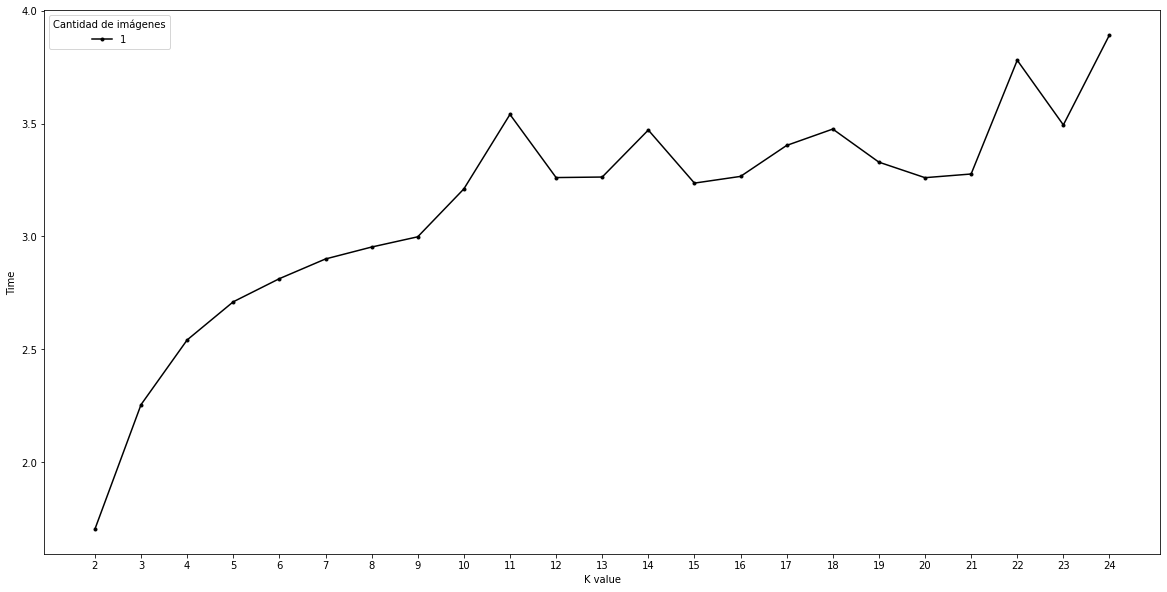

In [78]:
knn_times_K = data[2]
plt.figure(figsize=(20,10))    
plt.plot(K_list,knn_times_K[:23], line_styles[s])
plt.ylabel("Time")
plt.xlabel("K value")
plt.xticks(K_list)
#plt.yticks(Y_list)
plt.gca().legend("10000", title = "Cantidad de imágenes")
knn_times_K = knn_times_K[23:]

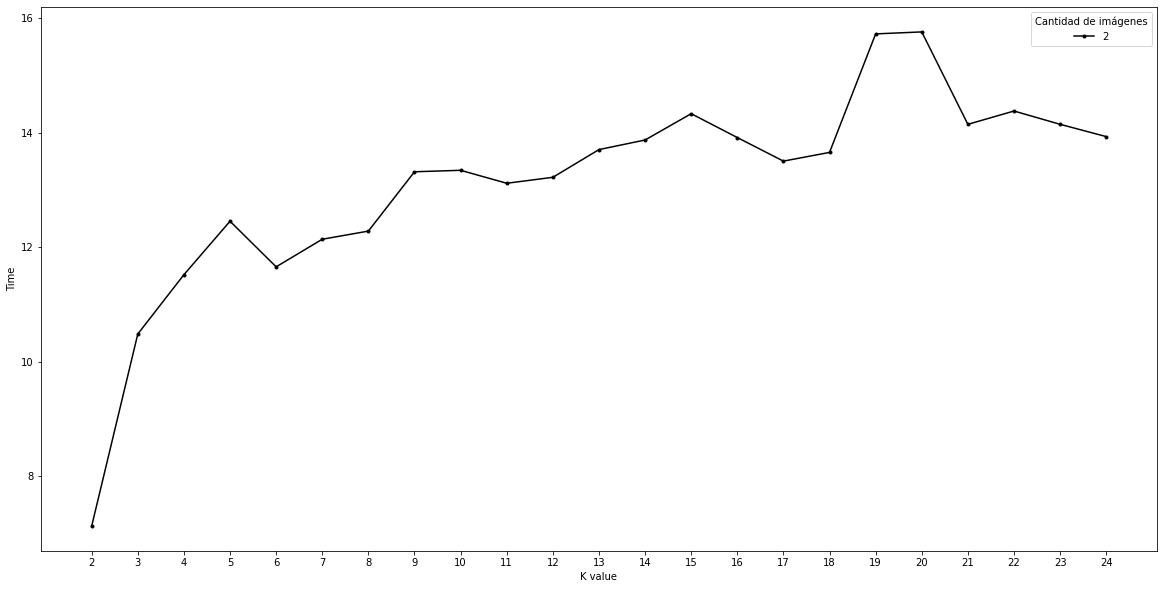

In [79]:
plt.figure(figsize=(20,10))    
plt.plot(K_list,knn_times_K[:23], line_styles[s])
plt.ylabel("Time")
plt.xlabel("K value")
plt.xticks(K_list)
#plt.yticks(Y_list)
plt.gca().legend("20000", title = "Cantidad de imágenes")
knn_times_K = knn_times_K[23:]

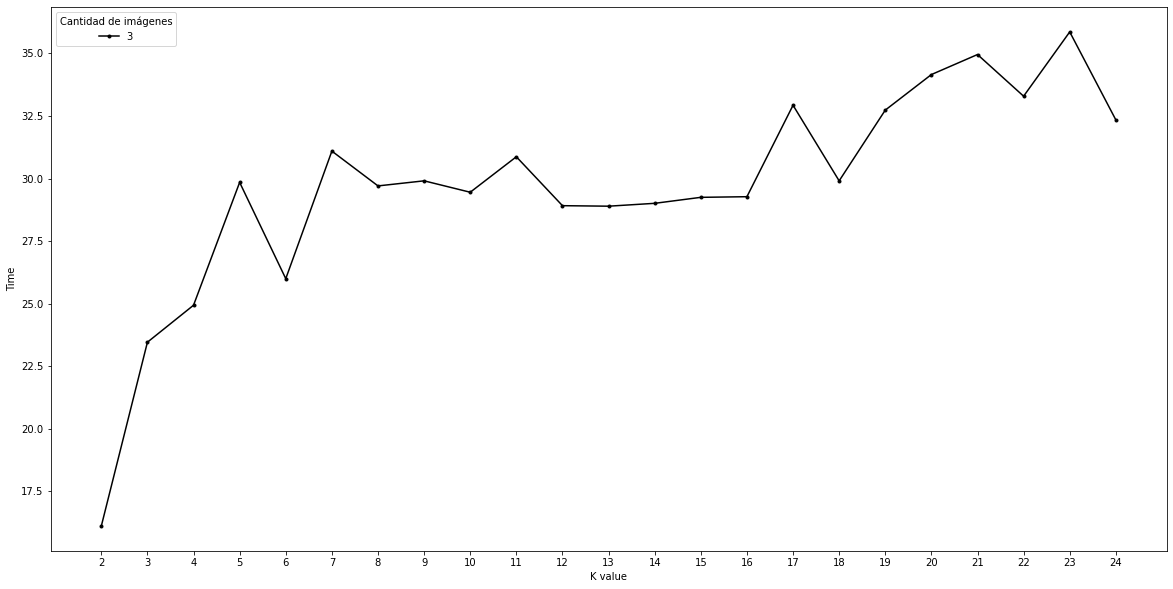

In [80]:
plt.figure(figsize=(20,10))    
plt.plot(K_list,knn_times_K[:23], line_styles[s])
plt.ylabel("Time")
plt.xlabel("K value")
plt.xticks(K_list)
#plt.yticks(Y_list)
plt.gca().legend("30000", title = "Cantidad de imágenes")
knn_times_K = knn_times_K[23:]

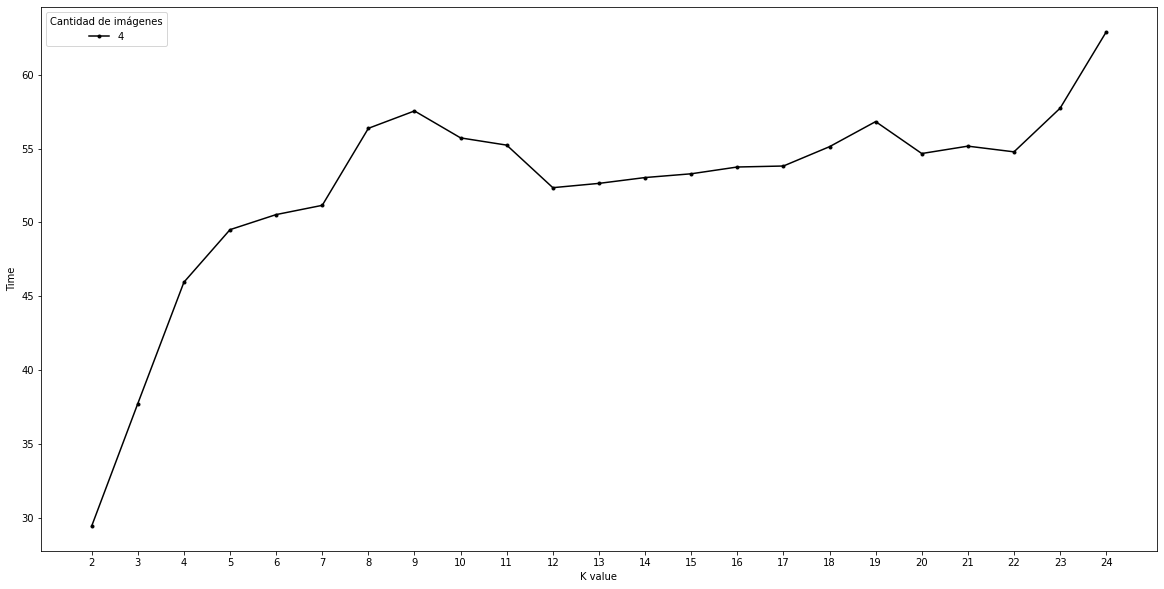

In [81]:
plt.figure(figsize=(20,10))    
plt.plot(K_list,knn_times_K[:23], line_styles[s])
plt.ylabel("Time")
plt.xlabel("K value")
plt.xticks(K_list)
#plt.yticks(Y_list)
plt.gca().legend("40000", title = "Cantidad de imágenes")
knn_times_K = knn_times_K[23:]

### Precision

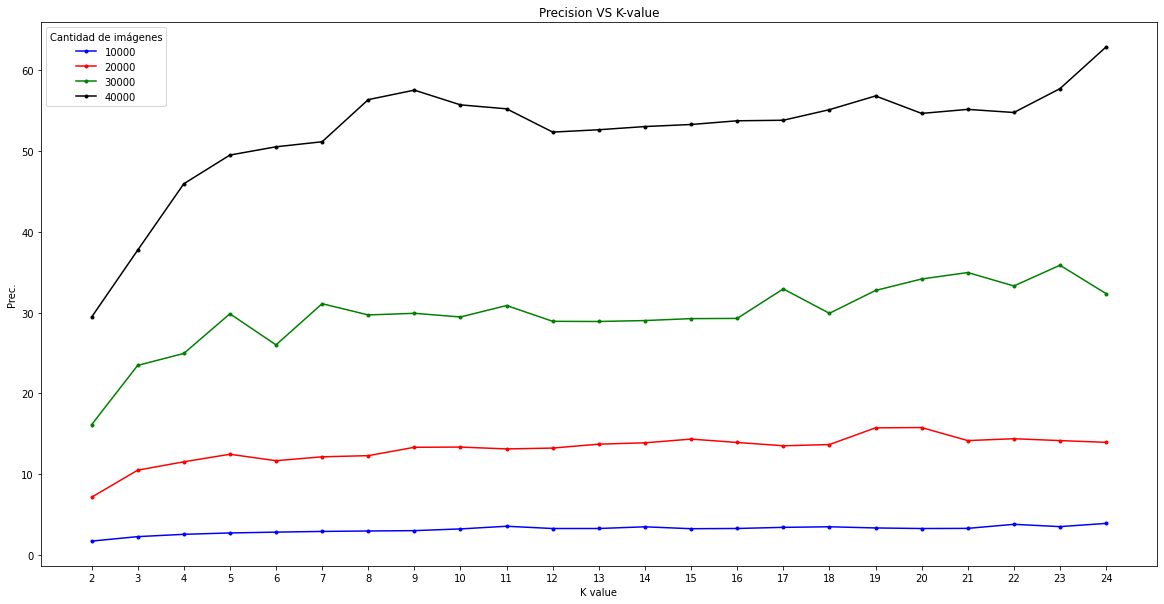

In [83]:
knn_Precision_K = data[2]
plt.figure(figsize=(20,10)) 
plt.title("Precision VS K-value")
for s in range(len(size_list)):    
    plt.plot(K_list,knn_Precision_K[0:23], line_styles[s])
    #plt.plot(K_list,pca_Precision_K, line_styles[1])
    plt.ylabel("Prec.")
    plt.xlabel("K value")
    plt.xticks(K_list)
    # plt.axis([1, alphas[-1], 0.1, 1])
    plt.gca().legend(size_list, title = "Cantidad de imágenes")
    plt.savefig("Cantidad de imágenes VS K-value/prec2.png") 
    knn_Precision_K = knn_Precision_K[23:]

### F-score

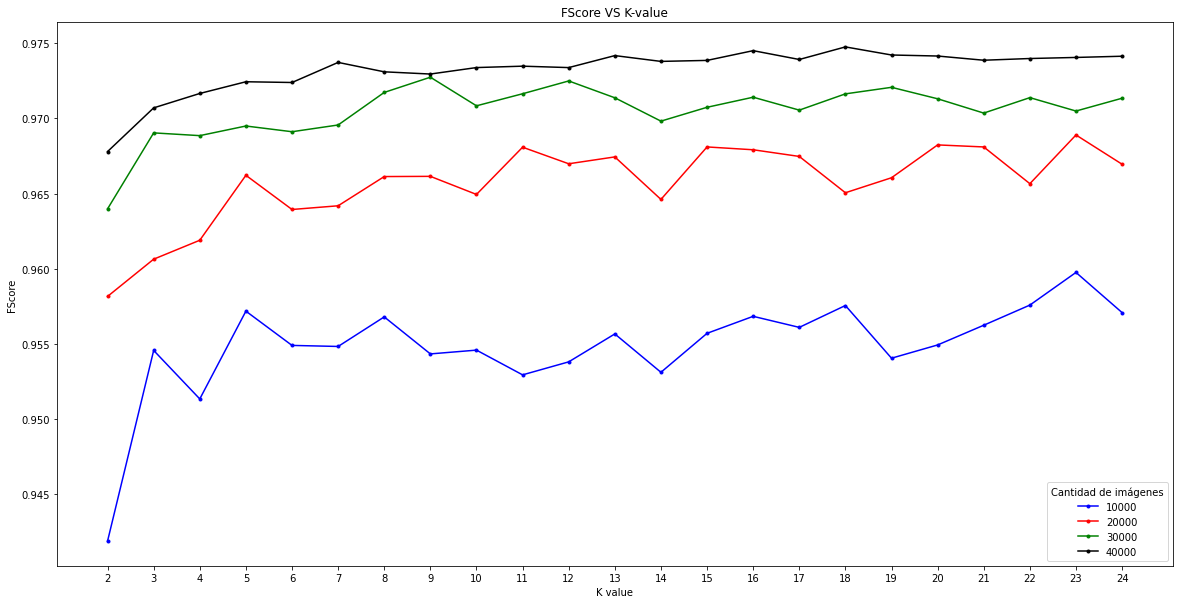

In [84]:
knn_F_Score_K = data[4]
plt.figure(figsize=(20,10)) 
plt.title("FScore VS K-value")
for s in range(len(size_list)):        
    plt.plot(K_list,knn_F_Score_K[0:23], line_styles[s])
    #plt.plot(K_list,pca_F_Score_K, line_styles[1])
    plt.ylabel("FScore")
    plt.xlabel("K value")
    plt.xticks(K_list)
    # plt.axis([1, alphas[-1], 0.1, 1])
    plt.gca().legend(size_list, title = "Cantidad de imágenes")
    plt.savefig("Cantidad de imágenes VS K-value/fs2.png")
    knn_F_Score_K = knn_F_Score_K[23:]

### Recall

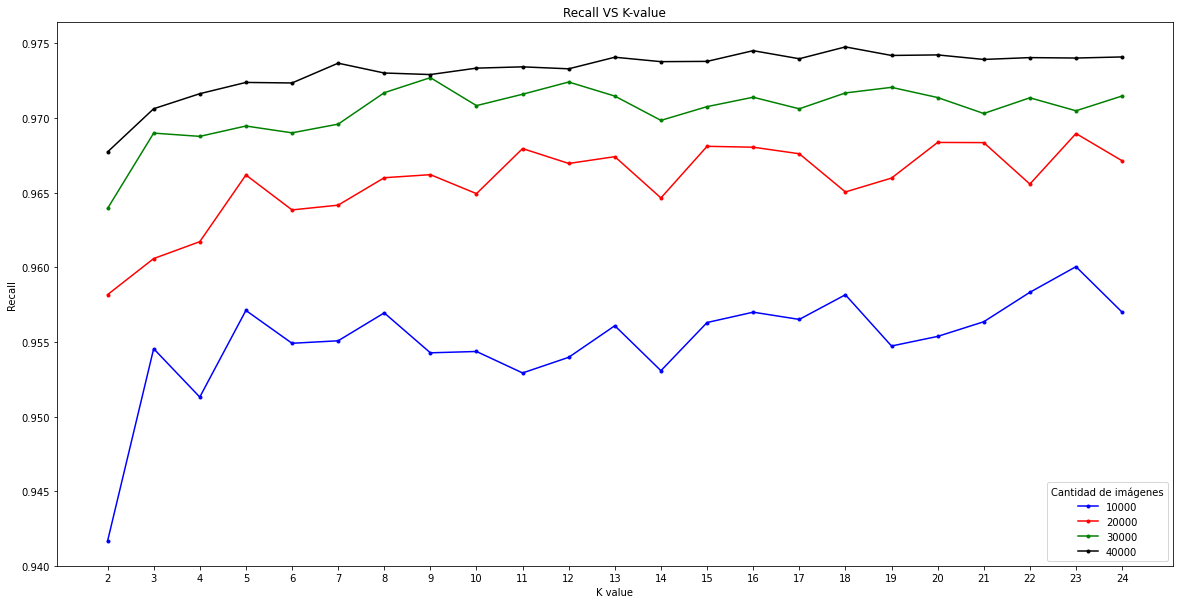

In [85]:
knn_Recall_K = data[3]
knn_accuracities_K = data
plt.figure(figsize=(20,10)) 
plt.title("Recall VS K-value")
for s in range(len(size_list)):        
    plt.plot(K_list,knn_Recall_K[0:23], line_styles[s])
    #plt.plot(K_list,pca_Recall_K, line_styles[1])
    plt.ylabel("Recall")
    plt.xlabel("K value")
    plt.xticks(K_list)
    # plt.axis([1, alphas[-1], 0.1, 1])
    plt.gca().legend(size_list, title = "Cantidad de imágenes")
    plt.savefig("Cantidad de imágenes VS K-value/rec2.png")
    len(knn_accuracities_K)
    knn_Recall_K = knn_Recall_K[23:]
    len(knn_accuracities_K) 